<a href="https://colab.research.google.com/github/Dhairya511/Life-Expectancy-Using-Machine-Learning/blob/main/LIFE_EXPECTANCY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import pandas as pd
import numpy as np
 
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
import math
import matplotlib.pyplot as plt
import seaborn as sns
 
import warnings

warnings.filterwarnings('ignore')
sns.set(rc={'figure.figsize':(20,25)})

In [33]:
df = pd.read_csv('/DATASET-LIFE EXPECTANCY.csv')
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [34]:
df.dtypes

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

In [35]:
df.columns = df.columns.str.strip()

In [36]:
df.shape

(2938, 22)

In [37]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [38]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

In [39]:
df = df[df['Life expectancy'].notna()]

In [41]:
df.fillna(value = df.mean(), inplace = True)

In [42]:
df.shape

(2928, 22)

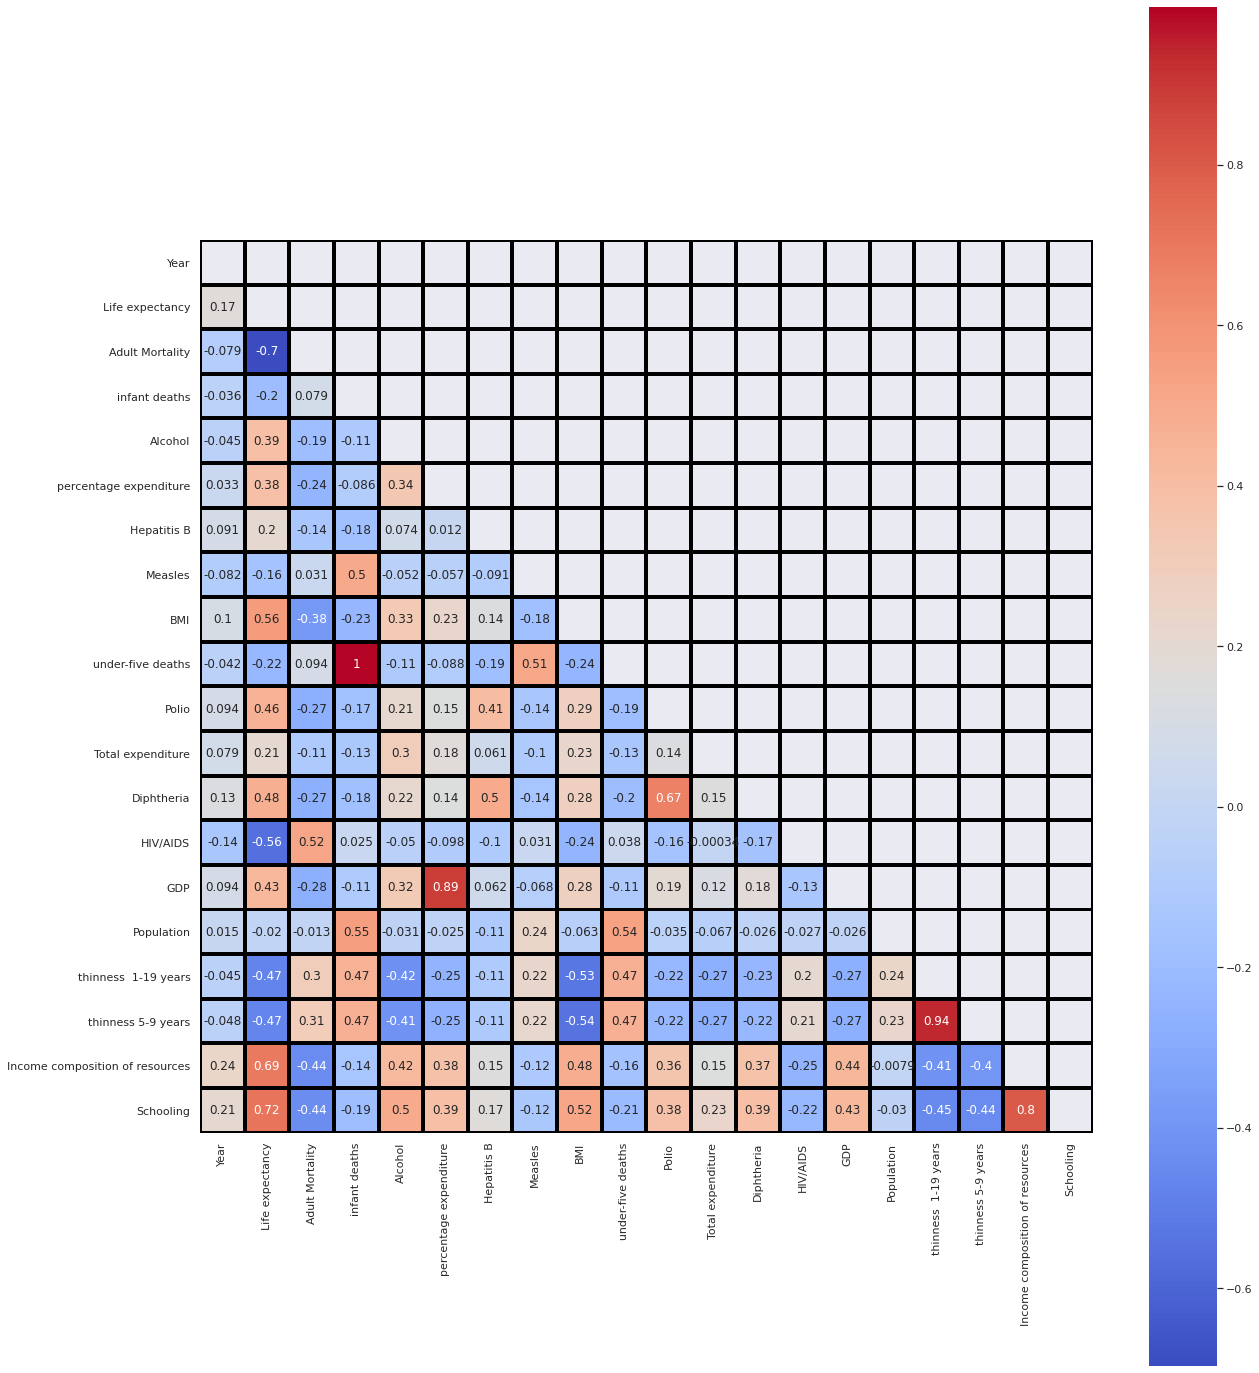

In [43]:
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot = True,cmap= 'coolwarm' ,linewidths=3, linecolor='black', square=True , mask=matrix)

In [44]:
df = df.drop(['percentage expenditure', 'thinness 5-9 years', 'infant deaths'], axis = 1)

In [45]:
status = pd.get_dummies(df.Status)
df = pd.concat([df, status], axis = 1)
df = df.drop(['Status'], axis=1)

In [46]:
y = df['Life expectancy']
x = df.drop(['Life expectancy','Country'], axis = 1)

In [47]:
df.columns

Index(['Country', 'Year', 'Life expectancy', 'Adult Mortality', 'Alcohol',
       'Hepatitis B', 'Measles', 'BMI', 'under-five deaths', 'Polio',
       'Total expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population',
       'thinness  1-19 years', 'Income composition of resources', 'Schooling',
       'Developed', 'Developing'],
      dtype='object')

In [49]:
min_max_scaler = MinMaxScaler()
x = min_max_scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [50]:
model = LinearRegression()

model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print('Intercept =', model.intercept_)
print('Coefficients = ', model.coef_)
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(  mse)
r2score = r2_score(y_test, y_pred)
print("Mean squared error(MSE) = %.2f" %   mse)
print("Root Mean squared error(RMSE) = %.2f" % rmse)
print('R2 score = %.2f' % r2score)

Intercept = 54.873661125421
Coefficients =  [ -0.20740706 -14.58081285   0.63818376  -1.86057958  -6.29938853
   3.31061534  -6.87108988   2.98272638   1.39057391   4.797417
 -23.94154639   5.0956026    6.74638625  -1.6211381    6.17712737
  13.52478332   0.84302365  -0.84302365]
Mean squared error(MSE) = 16.20
Root Mean squared error(RMSE) = 4.02
R2 score = 0.82
